In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Sales_Data (1).csv")

In [3]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
print("Initial Dataset Shape:", df.shape)

Initial Dataset Shape: (2823, 25)


# 2. Data Cleaning

In [5]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [6]:
# Handle missing values
df.dropna(inplace=True)

In [7]:
# Convert SALES column to numeric 
df["SALES"] = pd.to_numeric(df["SALES"], errors="coerce")

In [8]:
# Remove rows with invalid sales
df = df[df["SALES"] > 0]

In [9]:
print("\nDataset Shape After Cleaning:", df.shape)


Dataset Shape After Cleaning: (147, 25)


3. Basic Statistical Analysis

In [10]:
total_sales = df["SALES"].sum()
average_sales = df["SALES"].mean()
max_sales = df["SALES"].max()
min_sales = df["SALES"].min()

print("\n--- Sales Statistics ---")
print("Total Sales:", total_sales)
print("Average Sales:", round(average_sales, 2))
print("Maximum Sales:", max_sales)
print("Minimum Sales:", min_sales)


--- Sales Statistics ---
Total Sales: 506562.52
Average Sales: 3446.0
Maximum Sales: 9774.03
Minimum Sales: 652.35


4.Category-wise Sales Analysis

In [12]:
category_sales = df.groupby("PRODUCTLINE")["SALES"].sum().sort_values(ascending=False)

print("\n--- Sales by Product Category ---")
print(category_sales)


--- Sales by Product Category ---
PRODUCTLINE
Classic Cars        161870.46
Vintage Cars        138332.98
Motorcycles          75476.67
Trucks and Buses     66020.96
Planes               63772.09
Ships                 1089.36
Name: SALES, dtype: float64


 5. Region-wise Sales Analysis

In [26]:
region_sales = df.groupby("COUNTRY")["SALES"].sum().sort_values(ascending=False)

print("\n--- Sales by Region ---")
print(region_sales.head(10))
#  Top Performing Products
# -------------------------------
top_products = (
    df.groupby("PRODUCTLINE")["SALES"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
)


--- Sales by Region ---
COUNTRY
Australia    506562.52
Name: SALES, dtype: float64



 6. Visualization

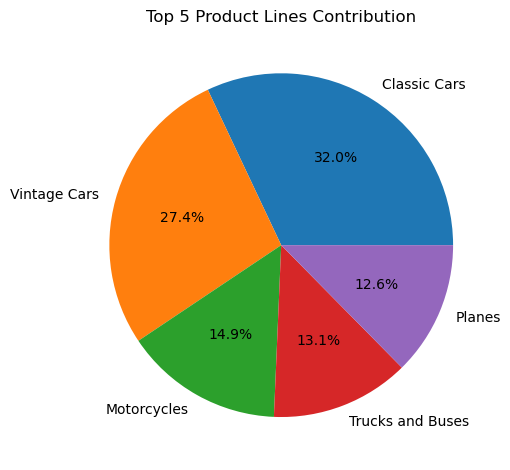

In [41]:
1. # Pie Chart: Top 5 Product Sales

plt.figure()
top_products.plot(kind="pie", autopct="%1.1f%%")
plt.title("Top 5 Product Lines Contribution")
plt.ylabel("")
plt.tight_layout()
plt.show()


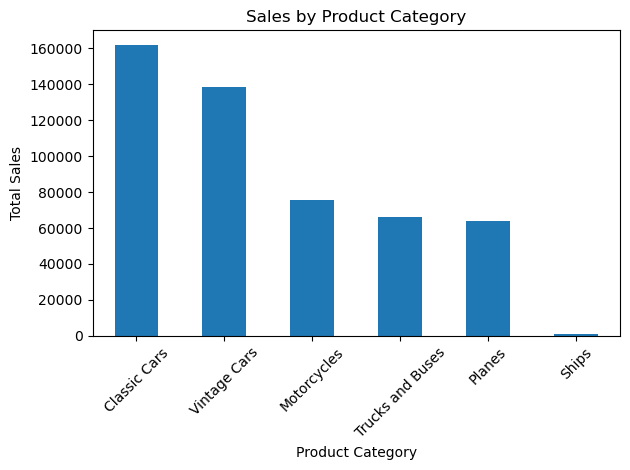

In [42]:
2. # Bar Chart

plt.figure()
category_sales.plot(kind="bar")
plt.title("Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

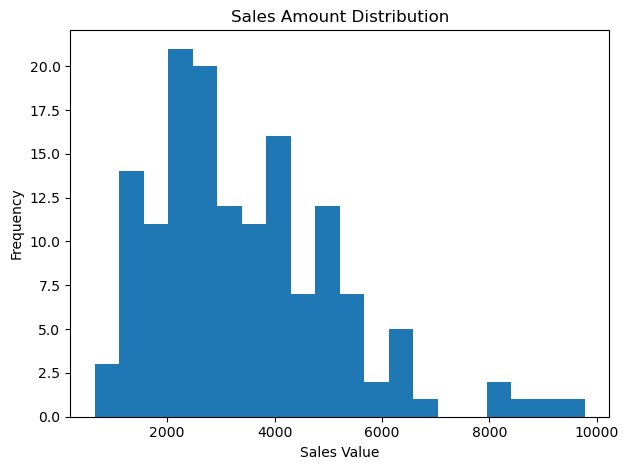

In [45]:
3.# Sales Distribution (Histogram)

plt.figure()
plt.hist(df["SALES"], bins=20)
plt.title("Sales Amount Distribution")
plt.xlabel("Sales Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
